<a href="https://colab.research.google.com/github/Jahobie/Calorie-Predication-Compairson-of-Machine-Learning-Models/blob/main/ML_Project_UI_Working_(1)_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://github.com/mrudulapatteparapu/kaggle-fitbit-dataset/raw/main/dailyActivity_merged.csv"

df = pd.read_csv(url)

df.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154


In [ ]:
df['Id'].nunique()

35

In [ ]:
df = df[['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']]
df.shape

(457, 9)

In [ ]:
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']
df.shape

(457, 10)

In [ ]:
df['TotalHours'] = round(df['TotalMinutes'] / 60, 2)
df.shape

(457, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    457 non-null    int64  
 1   ActivityDate          457 non-null    object 
 2   TotalSteps            457 non-null    int64  
 3   TotalDistance         457 non-null    float64
 4   VeryActiveMinutes     457 non-null    int64  
 5   FairlyActiveMinutes   457 non-null    int64  
 6   LightlyActiveMinutes  457 non-null    int64  
 7   SedentaryMinutes      457 non-null    int64  
 8   Calories              457 non-null    int64  
 9   TotalMinutes          457 non-null    int64  
 10  TotalHours            457 non-null    float64
dtypes: float64(2), int64(8), object(1)
memory usage: 39.4+ KB


In [ ]:
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    457 non-null    int64         
 1   ActivityDate          457 non-null    datetime64[ns]
 2   TotalSteps            457 non-null    int64         
 3   TotalDistance         457 non-null    float64       
 4   VeryActiveMinutes     457 non-null    int64         
 5   FairlyActiveMinutes   457 non-null    int64         
 6   LightlyActiveMinutes  457 non-null    int64         
 7   SedentaryMinutes      457 non-null    int64         
 8   Calories              457 non-null    int64         
 9   TotalMinutes          457 non-null    int64         
 10  TotalHours            457 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 39.4 KB


In [ ]:
df['Day'] = df['ActivityDate'].dt.day_name()
df.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours,Day
0,1503960366,2016-03-25,11004,7.11,33,12,205,804,1819,1054,17.57,Friday
1,1503960366,2016-03-26,17609,11.55,89,17,274,588,2154,968,16.13,Saturday


In [ ]:
df.isnull().sum()

Id                      0
ActivityDate            0
TotalSteps              0
TotalDistance           0
VeryActiveMinutes       0
FairlyActiveMinutes     0
LightlyActiveMinutes    0
SedentaryMinutes        0
Calories                0
TotalMinutes            0
TotalHours              0
Day                     0
dtype: int64

In [ ]:
dub = df.duplicated().sum()
if dub == 0:
    print("There are no duplicated values")

There are no duplicated values


In [ ]:
df.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
count,4.570000e+02,457,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,2016-04-04 04:40:26.258205696,6546.562363,4.663523,16.623632,13.070022,170.070022,995.282276,2189.452954,1195.045952,19.917265
min,1.503960e+09,2016-03-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,41.000000,0.680000
25%,2.347168e+09,2016-04-02 00:00:00,1988.000000,1.410000,0.000000,0.000000,64.000000,728.000000,1776.000000,985.000000,16.420000
50%,4.057193e+09,2016-04-05 00:00:00,5986.000000,4.090000,0.000000,1.000000,181.000000,1057.000000,2062.000000,1440.000000,24.000000
75%,6.391747e+09,2016-04-08 00:00:00,10198.000000,7.160000,25.000000,16.000000,257.000000,1285.000000,2667.000000,1440.000000,24.000000
max,8.877689e+09,2016-04-12 00:00:00,28497.000000,27.530001,202.000000,660.000000,720.000000,1440.000000,4562.000000,1440.000000,24.000000
std,2.293781e+09,NaN,5398.493064,4.082072,28.919704,36.208635,122.205372,337.021404,815.484523,306.457382,5.107794


# **Data Visualization**

Text(0.5, 0, 'Total Distance')

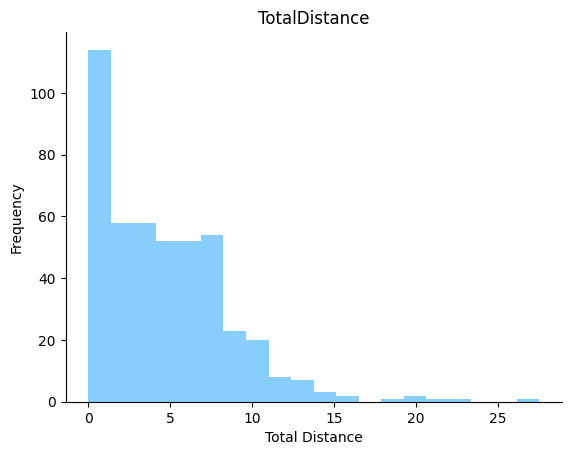

In [ ]:
df['TotalDistance'].plot(kind='hist', bins=20, title='TotalDistance', color = 'Lightskyblue')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Total Distance")

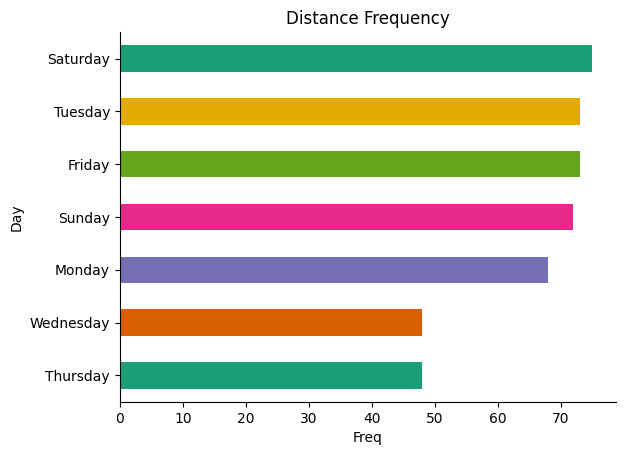

In [ ]:
# Calculate the frequency of each day
day_freq = df.groupby('Day').size()

# Sort the days based on frequency
day_freq_sorted = day_freq.sort_values()

# Plot the horizontal bar chart with sorted days
day_freq_sorted.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Freq')
plt.title("Distance Frequency")
plt.show()

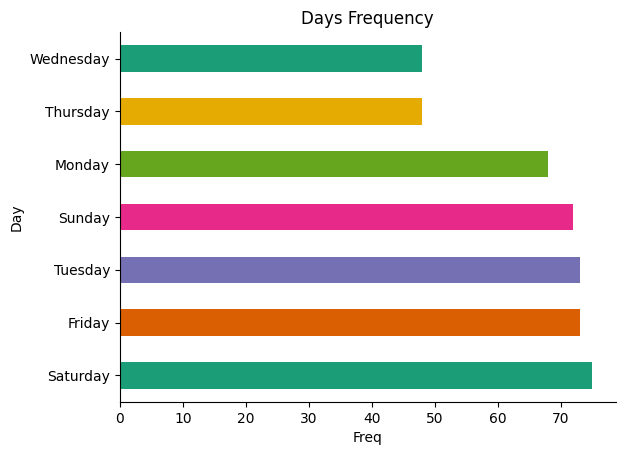

In [ ]:
df.groupby('Day').size().sort_values(ascending=False).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Freq')
plt.title('Days Frequency')
plt.show()

<Axes: >

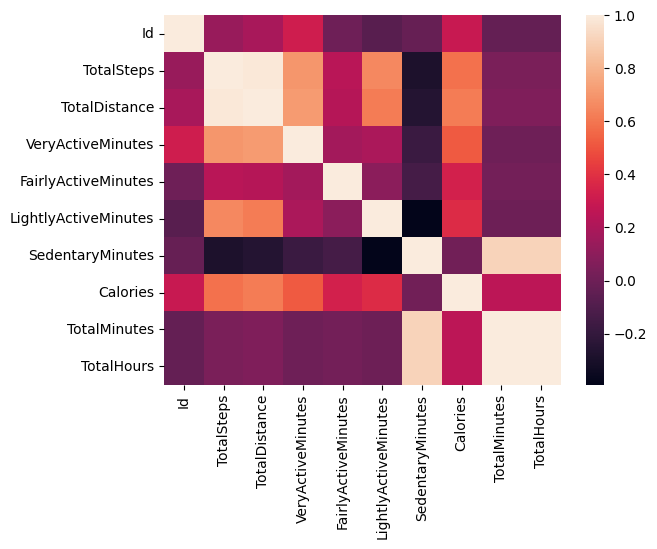

In [ ]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
corr_matrix = numerical_df.corr()

# Generate the heatmap
sns.heatmap(corr_matrix)

Text(0.5, 1.0, 'Calories by Total Steps')

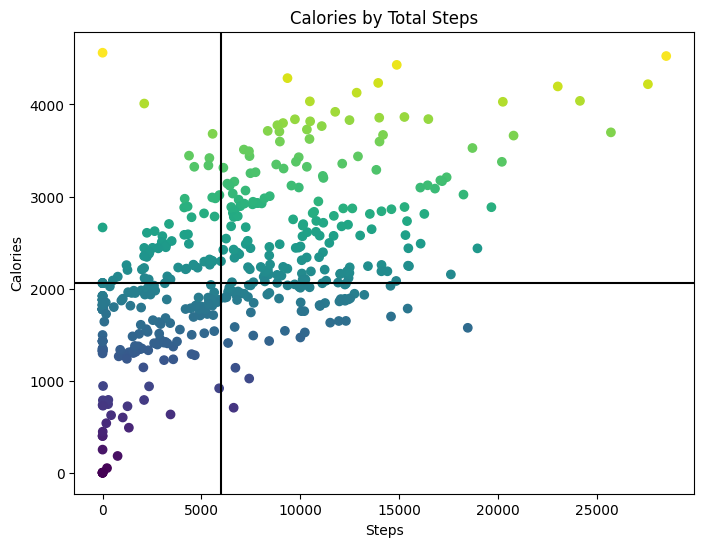

In [ ]:
plt.figure(figsize = ((8,6)))
plt.scatter(df.TotalSteps , df.Calories , c = df.Calories)
median_steps = 5986
median_calories = 2062

plt.axhline(median_calories , color = 'black' , label ='Median Of Calories')
plt.axvline(median_steps , color = 'black' , label ='Median Of Steps')

plt.xlabel("Steps")
plt.ylabel("Calories")
plt.title('Calories by Total Steps')

Text(0.5, 1.0, 'Calories by Total Hours')

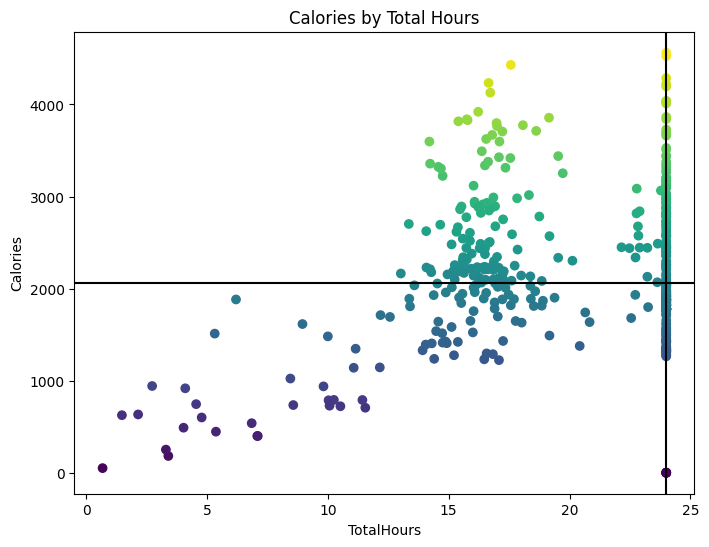

In [ ]:
plt.figure(figsize = ((8,6)))
plt.scatter(df.TotalHours , df.Calories , c = df.Calories)
median_hours = 24
median_calories = 2062

plt.axhline(median_calories , color = 'black' , label ='Median Of Calories')
plt.axvline(median_hours , color = 'black' , label ='Median Of Hours')

plt.xlabel("TotalHours")
plt.ylabel("Calories")
plt.title('Calories by Total Hours')

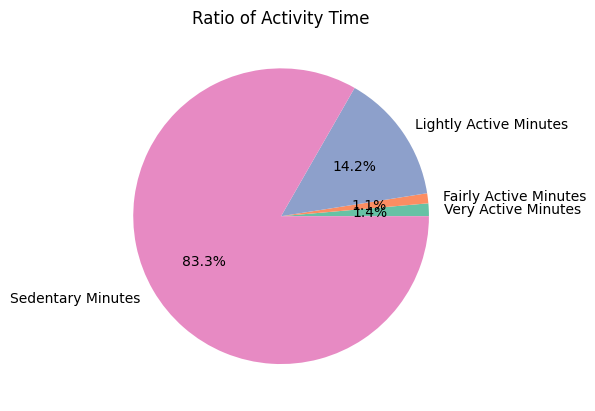

In [ ]:
labels = ['Very Active Minutes', 'Fairly Active Minutes', 'Lightly Active Minutes', 'Sedentary Minutes']
sizes = [df['VeryActiveMinutes'].mean(), df['FairlyActiveMinutes'].mean(), df['LightlyActiveMinutes'].mean(), df['SedentaryMinutes'].mean()]
colors = sns.palettes.mpl_palette('Set2')

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Ratio of Activity Time')
plt.show()

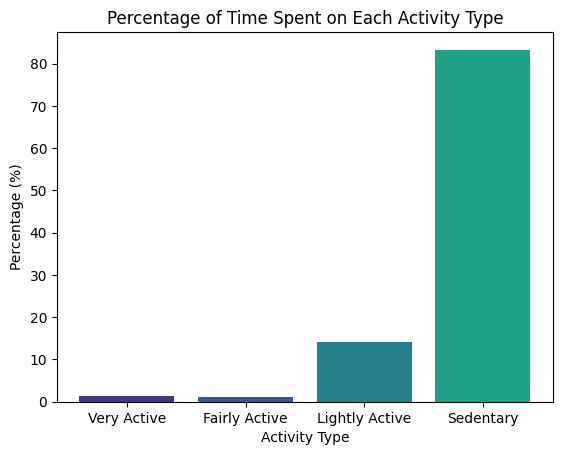

In [ ]:
# Get the total time for each activity type
total_time = df['TotalMinutes'].sum()

# Calculate the percentage of each activity type
very_active_percentage = df['VeryActiveMinutes'].sum() / total_time * 100
fairly_active_percentage = df['FairlyActiveMinutes'].sum() / total_time * 100
lightly_active_percentage = df['LightlyActiveMinutes'].sum() / total_time * 100
sedentary_percentage = df['SedentaryMinutes'].sum() / total_time * 100

# Create a bar chart
labels = ['Very Active', 'Fairly Active', 'Lightly Active', 'Sedentary']
colors = sns.palettes.mpl_palette('viridis')

plt.bar(labels, [very_active_percentage, fairly_active_percentage, lightly_active_percentage, sedentary_percentage], color=colors)
plt.title('Percentage of Time Spent on Each Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
features = df[['TotalSteps', 'TotalDistance', 'TotalHours']]
target = df['Calories']
print(features.head())
print(target.head())

   TotalSteps  TotalDistance  TotalHours
0       11004           7.11       17.57
1       17609          11.55       16.13
2       12736           8.53       15.57
3       13231           8.93       22.72
4       12041           7.85       17.70
0    1819
1    2154
2    1944
3    1932
4    1886
Name: Calories, dtype: int64


In [ ]:
features = df[['TotalSteps', 'TotalDistance', 'TotalHours']]
target = df['Calories']
print(features[100:])
print(target[100:])

     TotalSteps  TotalDistance  TotalHours
100        4931       3.320000       24.00
101        6999       4.720000       24.00
102        1846       1.240000       24.00
103        3417       2.300000       24.00
104        4863       3.280000       24.00
..          ...            ...         ...
452       23014      20.389999       24.00
453       16470       8.070000       24.00
454       28497      27.530001       24.00
455       10622       8.060000       24.00
456        2350       1.780000        9.82

[357 rows x 3 columns]
100    1708
101    1950
102    1508
103    1625
104    1772
       ... 
452    4196
453    3841
454    4526
455    2820
456     938
Name: Calories, Length: 357, dtype: int64


# **ML Model Prediction**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

# Ensure necessary columns exist
if 'VeryActiveMinutes' in df.columns and 'FairlyActiveMinutes' in df.columns and 'LightlyActiveMinutes' in df.columns:
    df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']
    df['TotalHours'] = df['TotalMinutes'] / 60
else:
    raise KeyError("Necessary columns for calculating 'TotalHours' are missing in the dataframe.")

# Feature Engineering
df['StepDistanceRatio'] = df['TotalSteps'] / df['TotalDistance']
df['ActiveHoursRatio'] = df['VeryActiveMinutes'] / df['TotalHours']

# Replace inf and NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Select features and target
features = df[['TotalSteps', 'TotalDistance', 'TotalHours', 'StepDistanceRatio', 'ActiveHoursRatio']]
target = df['Calories']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Initialize the XGBoost model
xg_model = xgb.XGBRegressor()

# Set up the grid search
grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, error_score='raise')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best score found: ", best_score)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = best_model.score(X_test, y_test)

print("Mean squared error after tuning:", mse)
print("Mean absolute error after tuning:", mae)
print("R^2 score after tuning:", r2)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}
Best score found:  -188616.96174098723
Mean squared error after tuning: 122431.86850531728
Mean absolute error after tuning: 236.2908507508117
R^2 score after tuning: 0.7934052895635185


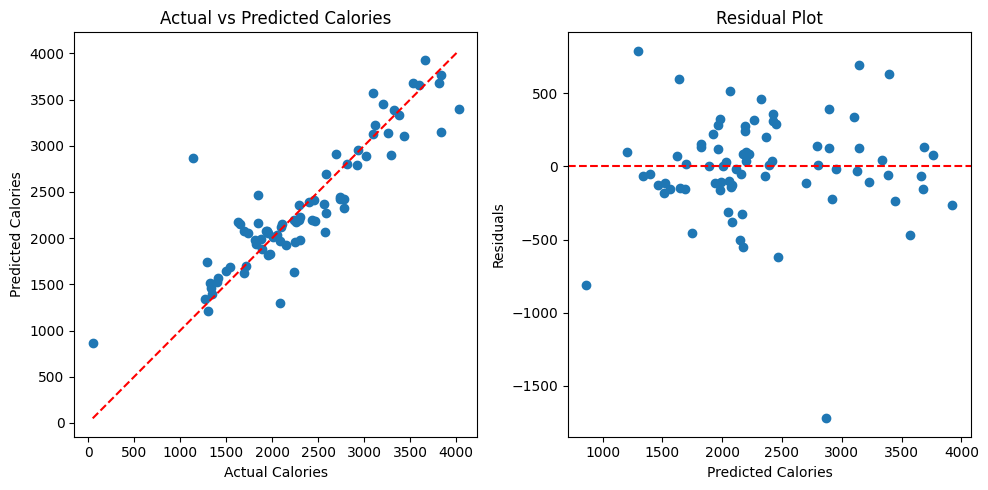

In [ ]:
# Plot predictions vs actual
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Calories')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

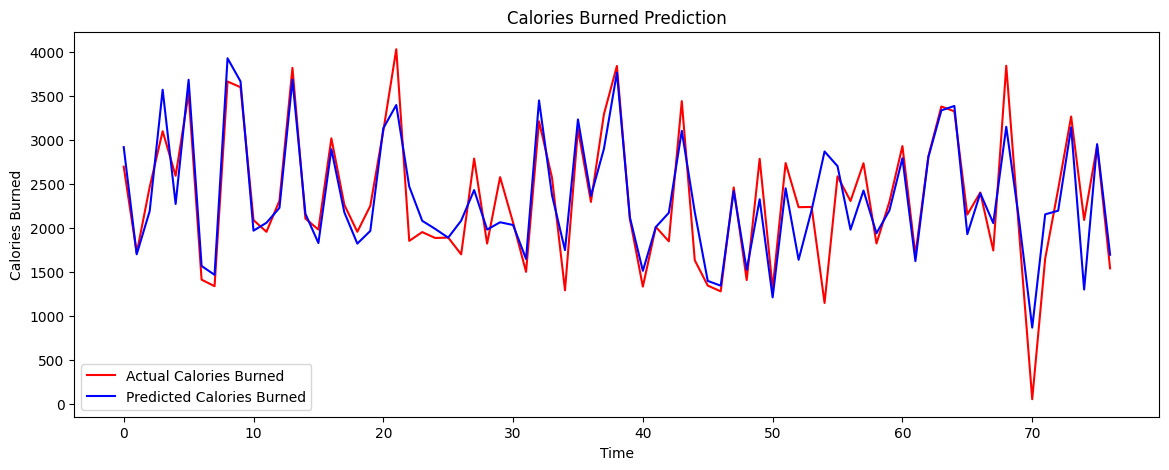

In [ ]:
# print(y_test.head(10))
# Visualizing the results
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, color='red', label='Actual Calories Burned')
plt.plot(y_pred, color='blue', label='Predicted Calories Burned')
plt.title('Calories Burned Prediction')
plt.xlabel('Time')
plt.ylabel('Calories Burned')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import joblib

# Load data
# df = pd.read_csv('AppDailyActivity Dataset.csv')

# Prepare input and output data
X = df[['TotalSteps', 'TotalDistance', 'TotalHours', 'StepDistanceRatio', 'ActiveHoursRatio']]
y = df['Calories']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

joblib.dump(scaler, 'scaler.pkl')

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# Build the model
model = Sequential([
    Bidirectional(LSTM(64, activation='relu', return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01))),
    BatchNormalization(),
    Dropout(0.3),
    Bidirectional(LSTM(32, activation='relu', return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(0.01))),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Define early stopping with increased patience
early_stopping = EarlyStopping(monitor='val_loss', patience=1000, restore_best_weights=True)

# Define learning rate scheduler with increased patience
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=500, min_lr=1e-6)

# Define callbacks
callbacks = [early_stopping, lr_scheduler]



In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10000, validation_data=(X_val, y_val), batch_size=64, callbacks=callbacks)

Streaming output truncated to the last 5000 lines.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2017538.0000 - mae: 1402.4971 - val_loss: 2203897.2500 - val_mae: 1442.1456 - learning_rate: 0.0010
Epoch 1139/10000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2142728.7500 - mae: 1446.0074 - val_loss: 2201007.5000 - val_mae: 1440.8607 - learning_rate: 0.0010
Epoch 1140/10000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2140670.5000 - mae: 1443.9504 - val_loss: 2223561.2500 - val_mae: 1447.6686 - learning_rate: 0.0010
Epoch 1141/10000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2129928.2500 - mae: 1442.3478 - val_loss: 2221931.7500 - val_mae: 1446.8091 - learning_rate: 0.0010
Epoch 1142/10000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2052655.5000 - mae: 1410.2029 - val_loss: 2196870.2500 - val_mae: 1438.8744 - learning_rate: 0.0010
Epoch 1143/10000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2022032.8750 - mae: 1397.8188 - val_loss: 2196283.5000 - val_mae: 1438.5441 - learning_r

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 19765.4746 - mae: 94.2792
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 131184.0938 - mae: 228.1676 
Train MAE: 93.91549682617188
Validation MAE: 241.43775939941406
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step
Train R^2: 0.967641198591896
Validation R^2: 0.7539718601809478
Train MSE: 19748.541937395978
Validation MSE: 145800.85230301708


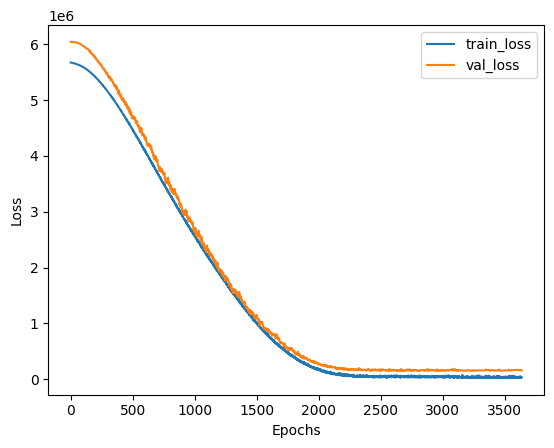

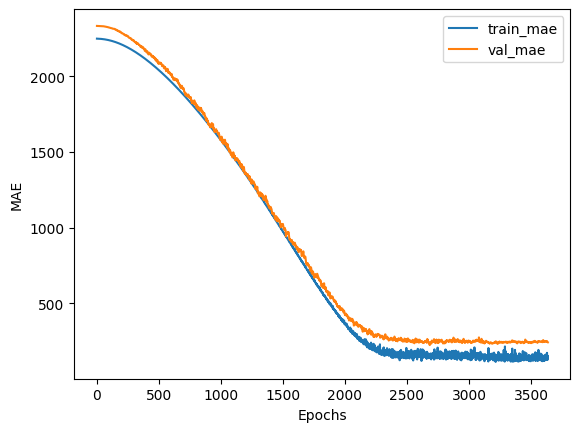

In [ ]:
from sklearn.metrics import r2_score

# Evaluate the model
train_loss, train_mae = model.evaluate(X_train, y_train)
val_loss, val_mae = model.evaluate(X_val, y_val)

print(f'Train MAE: {train_mae}')
print(f'Validation MAE: {val_mae}')

# Make predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate R^2
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Train R^2: {train_r2}')
print(f'Validation R^2: {val_r2}')

# Calcuate MSE
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

print(f'Train MSE: {train_mse}')
print(f'Validation MSE: {val_mse}')

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


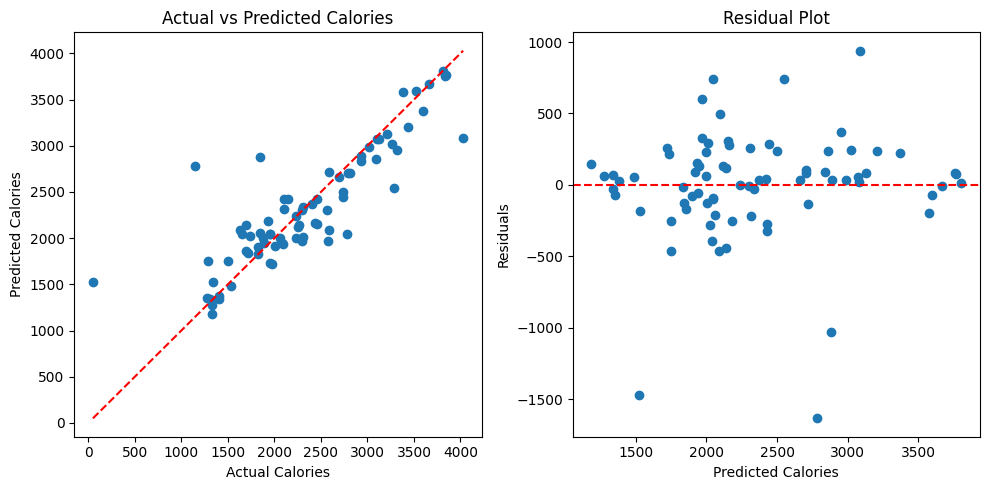

In [ ]:
# Plot predictions vs actual
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred.flatten()) # Flatten y_val_pred to 1D
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_val - y_val_pred.flatten() # Flatten y_val_pred for subtraction
plt.scatter(y_val_pred.flatten(), residuals) # Flatten y_val_pred for plotting
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Calories')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

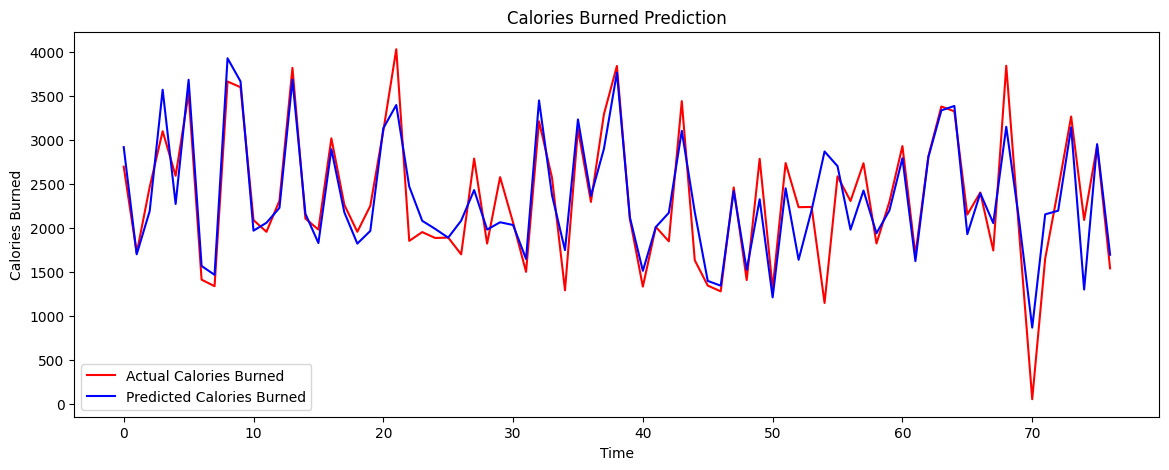

In [ ]:
# print(y_test.head(10))
# Visualizing the results
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, color='red', label='Actual Calories Burned')
plt.plot(y_pred, color='blue', label='Predicted Calories Burned')
plt.title('Calories Burned Prediction')
plt.xlabel('Time')
plt.ylabel('Calories Burned')
plt.legend()
plt.show()

## **Save The Model**

In [ ]:
import pickle

import pickle

# Save the trained model to a file
with open('best_xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

    print("XG Boost Model saved successfully!") # Dedent this line

# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
    print("LSTM Model saved successfully!")

# Load the model from the file
# with open('xg_model.pkl', 'rb') as f:
#   loaded_model = pickle.load(f)

XG Boost Model saved successfully!
LSTM Model saved successfully!


In [ ]:
# Import necessary libraries
import pickle
import numpy as np

# Load the model from the file
with open('best_xgboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Create the features array with all necessary features
Total_steps = 10000
Total_distance = 10
Total_hours = 5
VeryActiveMinutes = 120  # Example value for VeryActiveMinutes, adjust as needed

# Calculate the derived features
StepDistanceRatio = Total_steps / Total_distance
ActiveHoursRatio = VeryActiveMinutes / Total_hours

# Combine all features into an array
features = np.array([[Total_steps, Total_distance, Total_hours, StepDistanceRatio, ActiveHoursRatio]])

# Make a prediction using the loaded model
predicted_calories = loaded_model.predict(features)[0]

# Print the prediction
print(f"Predicted Calories: {predicted_calories:.2f}")


Predicted Calories: 3806.60


In [ ]:
# Import necessary libraries
import pickle
import numpy as np
from ipywidgets import ToggleButtons, FloatSlider, Button, VBox, HBox, Label, Output, HTML, Layout
from IPython.display import display
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the models from the files
with open('best_xgboost_model.pkl', 'rb') as f:
    loaded_xg_model = pickle.load(f)

with open('model.pkl', 'rb') as f:
    loaded_lstm_model = pickle.load(f)

scaler = joblib.load('scaler.pkl')

# Create the widgets
title = HTML("<h1>Calorie Prediction and Activity Recommendation</h1>")
description = HTML("<p>Use this tool to predict the number of calories burned based on your steps, distance, and hours of activity. You can also get recommended activities based on the predicted calories.</p>")

model_selector = ToggleButtons(
    description='Model:',
    options=['XGBoost', 'LSTM'],
    value='XGBoost',
    style={'description_width': 'initial'},
    button_style='primary'
)

step_slider = FloatSlider(
    description='Total Steps:',
    min=0,
    max=20000,
    value=10000,
    step=1000,
    style={'description_width': 'initial'}
)


distance_slider = FloatSlider(
    description='Total Distance:',
    min=0,
    max=20,
    value=5,
    step=1,
    style={'description_width': 'initial'}
)

hours_slider = FloatSlider(
    description='Active Hours:',
    min=0,
    max=24,
    value=3,
    step=1,
    style={'description_width': 'initial'}
)

predict_button = Button(
    description='Predict',
    button_style='success'
)

output_label = HTML()

# Activity recommendations
activities = pd.DataFrame({
    'activity': ['yoga', 'walking', 'swimming', 'strength training', 'cycling', 'running'],
    'intensity': ['low', 'low', 'moderate', 'moderate', 'high', 'high'],
    'calories_per_minute': [3, 5, 6, 7, 8, 10]
})

# Function to classify activity level
def classify_activity_level(predicted_calories):
    if predicted_calories < 1000:
        return 'Lightly Active'
    elif 1000 <= predicted_calories < 2000:
        return 'Moderately Active'
    else:
        return 'Highly Active'

# Recommendation function based on activity level
def recommend_activities(predicted_calories, activities, activity_level, duration_minutes=30):
    if activity_level == 'Lightly Active':
        recommendations = activities[activities['intensity'] == 'low']
        recommended_level = 'Moderately Active'
    elif activity_level == 'Moderately Active':
        recommendations = activities[activities['intensity'] == 'moderate']
        recommended_level = 'Highly Active'
    elif activity_level == 'Highly Active':
        recommendations = activities[activities['intensity'] == 'high']
        recommended_level = 'Lightly Active'

    recommended = []
    for _, row in recommendations.iterrows():
        total_calories = row['calories_per_minute'] * duration_minutes
        recommended.append((row['activity'], total_calories))

    return recommended, recommended_level

# Define the predict function
def predict(model, step, distance, hours):
    # Create the features array
    Total_steps = step
    Total_distance = distance
    Total_hours = hours
    VeryActiveMinutes = 120  # Example value for VeryActiveMinutes, adjust as needed

    StepDistanceRatio = Total_steps / Total_distance
    ActiveHoursRatio = VeryActiveMinutes / Total_hours

    # Create separate feature arrays for XGBoost and LSTM
    features_xgboost = np.array([[Total_steps, Total_distance, Total_hours, StepDistanceRatio, ActiveHoursRatio]])
    features_lstm = np.array([[Total_steps, Total_distance, Total_hours, StepDistanceRatio, ActiveHoursRatio]])

    # Predict using the selected model
    if model == 'XGBoost':
        predicted_calories = loaded_xg_model.predict(features_xgboost)[0]
    elif model == 'LSTM':
        # Load the scaler
        scaler = joblib.load('scaler.pkl')
        features_df = pd.DataFrame(features_lstm, columns=['TotalSteps', 'TotalDistance', 'TotalHours', 'StepDistanceRatio', 'ActiveHoursRatio'])
        features_scaled = scaler.transform(features_df)
        features_scaled = features_scaled.reshape((features_scaled.shape[0], 1, features_scaled.shape[1]))
        predicted_calories = loaded_lstm_model.predict(features_scaled)[0][0]
    else:
        predicted_calories = 0

    # Classify activity level based on predicted calories
    activity_level = classify_activity_level(predicted_calories)

    # Get recommendations based on the predicted calories and activity level
    recommendations, recommended_level = recommend_activities(predicted_calories, activities, activity_level, Total_hours * 60)

    # Display recommendations
    if recommendations:
        output_label.value = f'Predicted Calories: <b>{predicted_calories:.2f}</b><br>' \
                              f'Activity Level: <b>{activity_level}</b><br>' \
                              f'<i>We recommend activities from the {recommended_level} category.</i><br>' \
                              f'Recommended activities:\n' + \
                              '\n'.join([f'- {activity}: {calories:.2f} calories' for activity, calories in recommendations])
    else:
        output_label.value = (f'Predicted Calories: {predicted_calories:.2f}\n'
                              f'No activities found within the calorie range.')

# Connect the button click event to the predict function
predict_button.on_click(lambda b: predict(model_selector.value, step_slider.value, distance_slider.value, hours_slider.value))

# Create the layout
ui = VBox([
    title,
    description,
    HBox([model_selector]),
    HBox([step_slider]),
    HBox([distance_slider]),
    HBox([hours_slider]),
    predict_button,
    output_label
], layout=Layout(align_items='center'))

# Display the UI
ui


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
